<a href="https://colab.research.google.com/github/Bkalene/exercicios-python/blob/main/Pandas_Aula_5_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando biblioteca pandas
import pandas as pd

In [3]:
#Lenitura dos arquivos que estão no meu Drive
df1 = pd.read_excel('/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx')
df2  = pd.read_excel('/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx')
df3  = pd.read_excel('/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx')
df4  = pd.read_excel('/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx')
df5  = pd.read_excel('/content/drive/MyDrive/DIO/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx')

In [8]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [9]:
#exibindo a 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [10]:
#pegando amostras do df
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
142,Natal,2019-01-02,7.12,1034,1
138,Natal,2019-01-02,212.03,1037,3
15,Natal,2018-02-01,432.00,854,3
15,Fortaleza,2019-01-01,195.05,1002,2
38,Fortaleza,2019-01-01,35.09,1004,4


In [11]:
#verificando o tipo de dado do df
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,int64
Qtde,int64


In [12]:
#alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [13]:
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64


In [14]:
#consultandoo linhas cooom valores faltantes
df.isnull().sum()

,0
Cidade,0
Data,0
Vendas,0
LojaID,0
Qtde,0


In [18]:
df.dropna(how="all",inplace=True)

In [20]:
#criando uma coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [22]:
df["Receita"].max()

3544.0

In [23]:
df["Receita"].min()

3.34

In [26]:
#tirar o top "3" da coluna receita
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [28]:
#tirar o top  3 piores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [31]:
#agrupando por cidades
df.groupby("Cidade")["Receita"].sum()

,Receita
Cidade,
Aracaju,48748.25
Fortaleza,37913.97
Natal,167227.52
Recife,51936.51
Salvador,40596.73


In [32]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# ***DATAS***

In [33]:
#Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [34]:
df.dtypes

,0
Cidade,object
Data,int64
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [35]:
#Transformando a coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [36]:
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [37]:
#agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

,Receita
Data,
2018,118176.53
2019,228246.45


In [38]:
#Criar coluna de ano no data set
df["Ano_Venda"] = df["Data"].dt.year

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
116,Aracaju,2018-01-01,48.44,1522,4,193.76,2018
65,Aracaju,2018-01-01,145.54,1522,3,436.62,2018
167,Salvador,2019-01-02,36.42,1037,1,36.42,2019
101,Salvador,2019-01-01,32.28,1035,3,96.84,2019
140,Fortaleza,2019-03-02,166.89,983,5,834.45,2019


In [40]:
#extraindo mês e dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
51,Recife,2019-01-01,146.95,982,2,293.90,2019,1,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019,3,2
231,Natal,2019-01-03,89.85,1034,2,179.70,2019,1,3
127,Fortaleza,2019-03-02,39.56,982,8,316.48,2019,3,2
142,Salvador,2019-01-02,7.12,1034,1,7.12,2019,1,2


In [42]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [43]:
#calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias
20,Natal,2018-06-08,608.00,852,4,2432.00,2018,6,8,158 days
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days
40,Recife,2019-02-13,36.22,983,6,217.32,2019,2,13,408 days
102,Recife,2019-01-01,96.50,982,7,675.50,2019,1,1,365 days
53,Aracaju,2018-01-01,8.64,1522,2,17.28,2018,1,1,0 days


In [46]:
#Criando coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
221,Salvador,2019-01-02,142.23,1035,2,284.46,2019,1,2,366 days,1
208,Natal,2019-01-02,39.40,1036,3,118.20,2019,1,2,366 days,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
34,Recife,2019-01-01,24.97,980,5,124.85,2019,1,1,365 days,1


In [47]:
#Filtrando as vendas do ano de 2019 do mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


# ***Visualização de Dados***

In [48]:
df["LojaID"].value_counts(ascending=False)

,count
LojaID,
1036,117
1035,112
1037,101
1034,67
983,65
982,44
1522,41
1520,39
980,36


<Axes: xlabel='LojaID'>

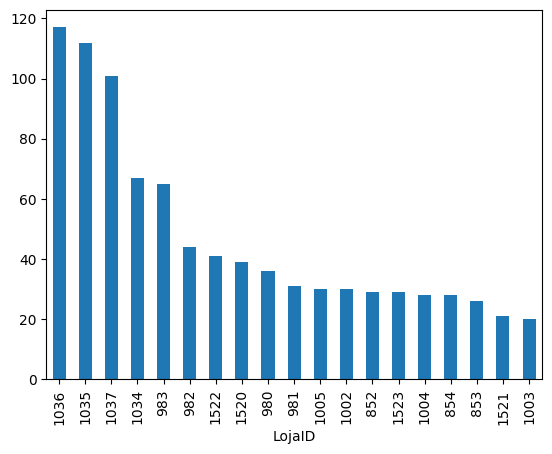

In [49]:
#grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

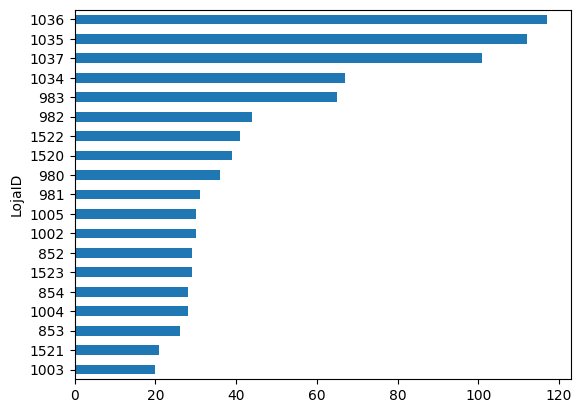

In [51]:
#barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

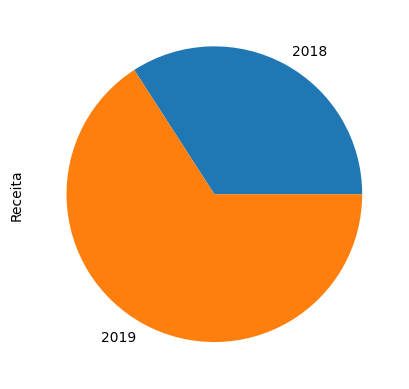

In [54]:
#Grafico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [55]:
#Total de vendas por cidade
df["Cidade"].value_counts()

,count
Cidade,
Natal,240
Salvador,240
Fortaleza,142
Recife,142
Aracaju,130


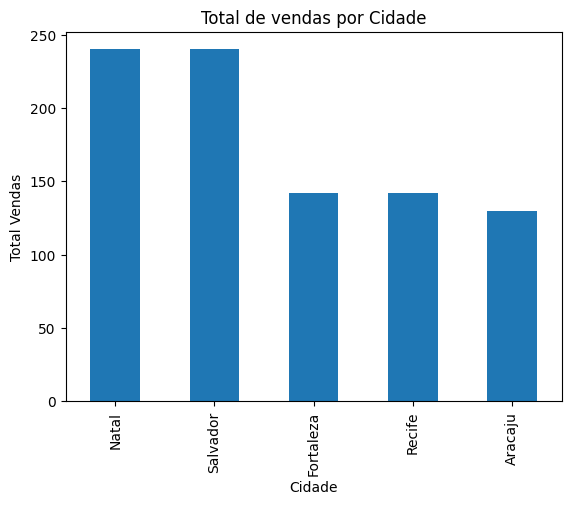

In [56]:
#adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

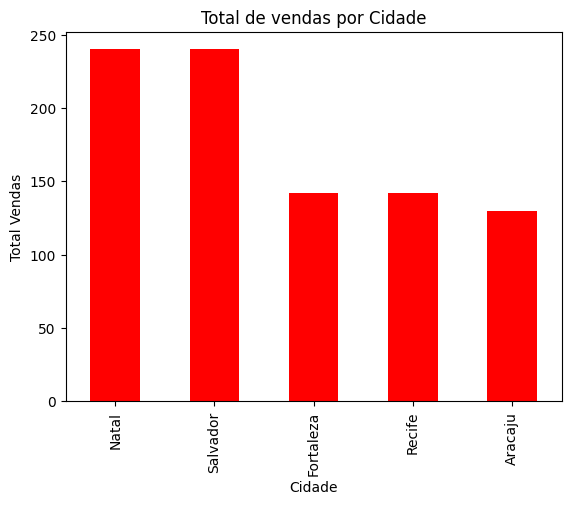

In [57]:
#alterando a cor das barras
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

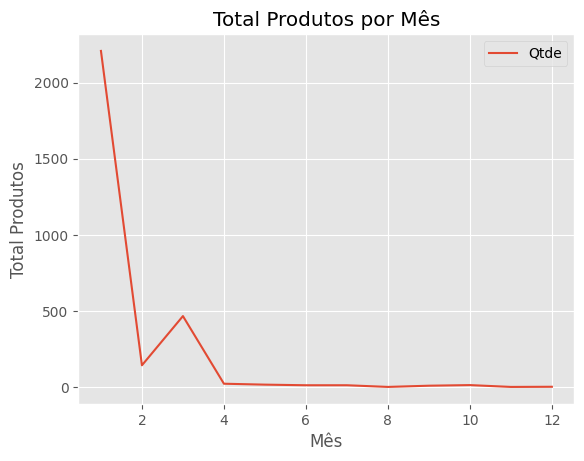

In [61]:
#alterando o estilo
plt.style.use("ggplot")
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total Produtos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos");
plt.legend();

In [62]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [65]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

,Qtde
Mes_Venda,
1,1541
2,128
3,460
4,12


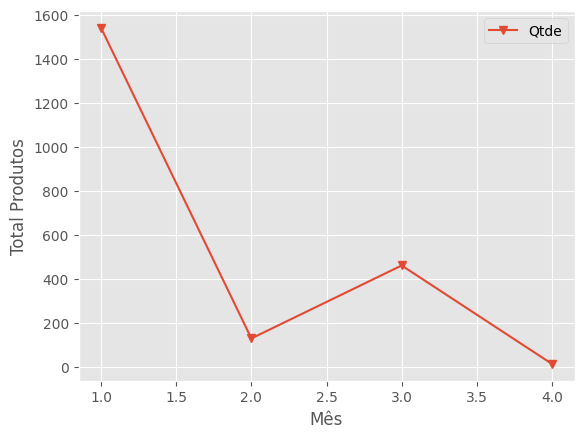

In [64]:
#total produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos");
plt.legend();

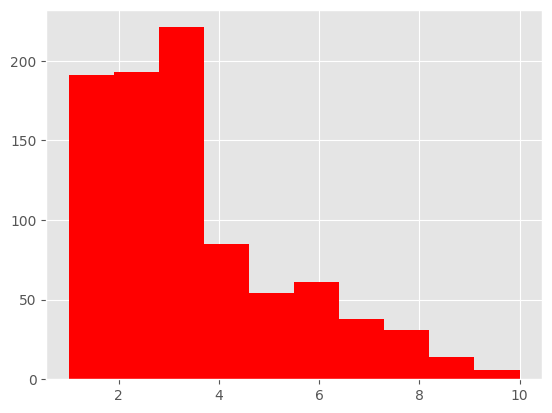

In [66]:
#histograma
plt.hist(df["Qtde"], color="red");

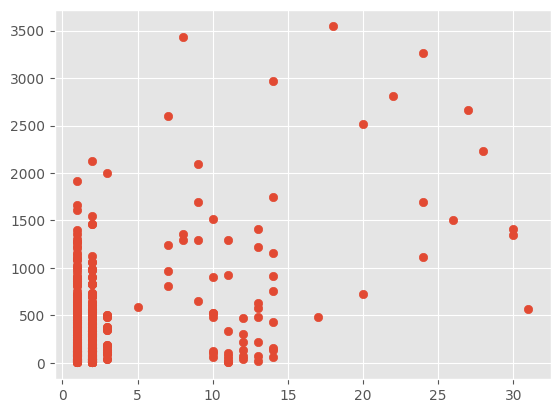

In [69]:
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"]);

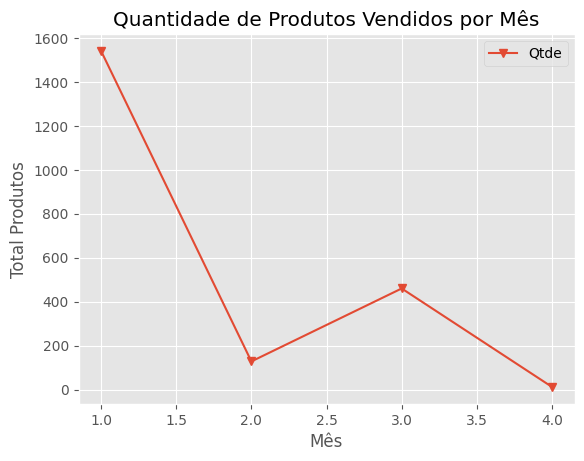

In [70]:
#salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="v")
plt.title("Quantidade de Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos");
plt.legend()
plt.savefig("grafico QTDE X MES.png")